In [2]:
import pandas as pd

In [3]:
df_dates = pd.read_csv('./dates_daily_CDR.csv', header=None)
df_target = pd.read_csv('./results_daily_CDR.csv', header=None)

In [4]:
df_dates.head()

,0
0,1509667200
1,1509580800
2,1509494400
3,1509408000
4,1509321600


In [5]:
df_target.head()

,0,1,2,3
0,5.70,5.94,5.63,5.75
1,5.61,5.81,5.55,5.78
2,5.46,5.63,5.44,5.62
3,5.45,5.48,5.41,5.44
4,5.50,5.50,5.42,5.45


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
normalizer = StandardScaler()

In [8]:
df = df_target
df['dates'] = df_dates

In [9]:
df.rename(columns={0: 'open', 1:'high', 2:'low',3:'close'}, inplace=True)

In [10]:
df.head()

,open,high,low,close,dates
0,5.70,5.94,5.63,5.75,1509667200
1,5.61,5.81,5.55,5.78,1509580800
2,5.46,5.63,5.44,5.62,1509494400
3,5.45,5.48,5.41,5.44,1509408000
4,5.50,5.50,5.42,5.45,1509321600


In [11]:
df.shape

(4490, 5)

In [12]:
df_train, df_test = df[490:], df[:490] #  Training data is older data, test is the newer. Index 0 corresponds to most recent row

In [13]:
df_test.tail()

,open,high,low,close,dates
485,7.33,7.3501,7.145,7.15,1449014400
486,7.33,7.3950,7.300,7.36,1448928000
487,7.37,7.4000,7.260,7.32,1448841600
488,7.25,7.4000,7.240,7.36,1448582400
489,7.28,7.2800,7.210,7.26,1448409600


In [14]:
df_train.head()

,open,high,low,close,dates
490,7.22,7.260,7.13,7.26,1448323200
491,7.17,7.240,7.14,7.23,1448236800
492,7.06,7.180,7.05,7.16,1447977600
493,6.91,7.015,6.91,7.01,1447891200
494,6.79,6.920,6.76,6.91,1447804800


In [15]:
df_train.shape, df_test.shape

((4000, 5), (490, 5))

In [16]:
X_tr, y_tr = df_train['dates'], df_train[['open', 'high', 'low', 'close']]

In [17]:
X_te, y_te = df_test['dates'], df_test[['open', 'high', 'low', 'close']]

In [18]:
X_tr_tmp = X_tr.values[:-1]

In [19]:
X_tr_tmp

array([1448323200, 1448236800, 1447977600, ...,  947116800,  947030400,
        946944000], dtype=int64)

In [20]:
X_tr2_tmp = y_tr.values[1:, 0] #  The first row (index 0) does not have an y corresponding to open for the next day so we ignore it, also we only predict open price so 0th column

In [21]:
X_tr2_tmp

array([ 7.17,  7.06,  6.91, ...,  5.62,  5.75,  5.75])

In [22]:
X_te_tmp = X_te.values[:-1]
X_te2_tmp = y_te.values[1:, 0]

In [23]:
import numpy as np

In [24]:
X_tmp = np.concatenate([X_tr_tmp.reshape(-1,1), X_tr2_tmp.reshape(-1,1)], axis=1)

In [25]:
y_tmp = y_tr.values[:-1, :]

In [26]:
X_tmp[0], y_tmp[0], y_tmp[1]

(array([  1.44832320e+09,   7.17000000e+00]),
 array([ 7.22,  7.26,  7.13,  7.26]),
 array([ 7.17,  7.24,  7.14,  7.23]))

In [27]:
X_tmp_te = np.concatenate([X_te_tmp.reshape(-1,1), X_te2_tmp.reshape(-1,1)], axis=1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.activations import relu, elu
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.losses import mean_absolute_error

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(BatchNormalization(input_shape=(2,)))
model.add(Dense(1024, use_bias=False, activation='tanh'))
model.add(Dense(1, use_bias=False))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1024      
Total params: 3,080
Trainable params: 3,076
Non-trainable params: 4
_________________________________________________________________


In [33]:
model.compile('adam', 'mse', metrics=['mse'])

In [34]:
model.fit(X_tmp, y_tmp[:, 0], epochs=10000, batch_size=32)

Epoch 1/10000
3999/3999 [==============================] - 1s 168us/step - loss: 0.8848 - mean_squared_error: 0.8848
Epoch 2/10000
3999/3999 [==============================] - 0s 110us/step - loss: 0.9551 - mean_squared_error: 0.9551
Epoch 3/10000
3999/3999 [==============================] - 0s 124us/step - loss: 0.7410 - mean_squared_error: 0.7410
Epoch 4/10000
3999/3999 [==============================] - 0s 103us/step - loss: 0.9168 - mean_squared_error: 0.9168
Epoch 5/10000
3999/3999 [==============================] - 0s 101us/step - loss: 1.0765 - mean_squared_error: 1.0765
Epoch 6/10000
3999/3999 [==============================] - 0s 99us/step - loss: 0.8181 - mean_squared_error: 0.8181
Epoch 7/10000
3999/3999 [==============================] - 0s 109us/step - loss: 0.8022 - mean_squared_error: 0.8022
Epoch 8/10000
3999/3999 [==============================] - 0s 113us/step - loss: 0.7630 - mean_squared_error: 0.7630
Epoch 9/10000
3999/3999 [==============================] - 0s 109

KeyboardInterrupt: 

In [35]:
np.sqrt(0.8723)

0.93397002093214965

In [36]:
import datetime

In [37]:
row = '2017-11-07'
timestamp_as_list = row.split('-')
year = int(timestamp_as_list[0])
month = int(timestamp_as_list[1])
day = int(timestamp_as_list[2])
date = datetime.datetime(year=year, month=month, day=day, tzinfo=datetime.timezone.utc)  # Convert to UTC time
unix_time = int(date.timestamp())

In [38]:
model.predict(np.array([[unix_time, 5.8600]]))

array([[ 5.67229414]], dtype=float32)

In [39]:
prediction = model.predict(X_tmp_te)

In [40]:
prediction_tr = model.predict(X_tmp)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

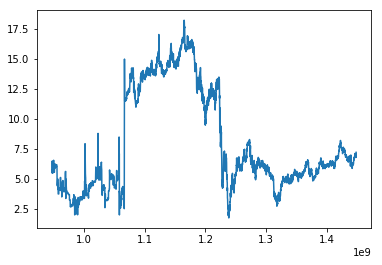

In [43]:
plt.plot(X_tr.values, y_tr.values[:, 0])

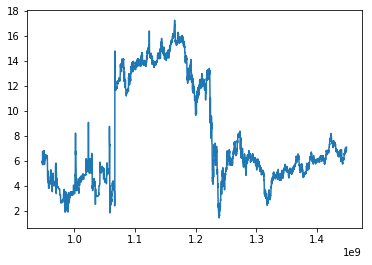

In [44]:
plt.plot(X_tmp[:, 0], prediction_tr[:, 0])

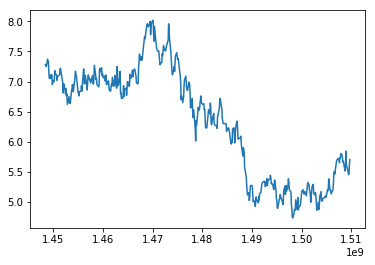

In [45]:
plt.plot(X_te.values, y_te.values[:, 0])

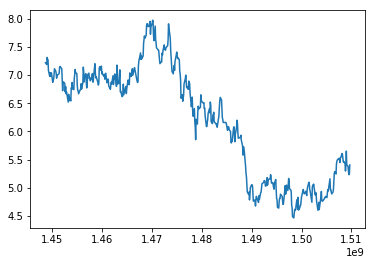

In [46]:
plt.plot(X_tmp_te[:, 0], prediction[:, 0])

In [47]:
y_te.values[:, 0]

array([ 5.7 ,  5.61,  5.46,  5.45,  5.5 ,  5.59,  5.61,  5.84,  5.6 ,
        5.51,  5.63,  5.67,  5.66,  5.72,  5.78,  5.8 ,  5.73,  5.73,
        5.65,  5.7 ,  5.72,  5.7 ,  5.69,  5.67,  5.62,  5.46,  5.5 ,
        5.47,  5.33,  5.2 ,  5.16,  5.13,  5.16,  5.2 ,  5.2 ,  5.38,
        5.23,  5.18,  5.2 ,  5.15,  5.07,  5.09,  5.07,  5.07,  5.05,
        5.01,  5.01,  5.02,  5.17,  5.08,  4.93,  4.87,  4.99,  4.87,
        4.86,  5.  ,  5.1 ,  5.15,  5.11,  5.14,  5.29,  5.26,  5.27,
        5.24,  4.99,  5.13,  5.17,  5.2 ,  5.29,  5.32,  5.24,  5.19,
        5.1 ,  5.13,  5.17,  5.13,  5.13,  5.16,  5.2 ,  5.17,  5.08,
        5.02,  4.94,  4.94,  4.9 ,  4.86,  5.07,  4.87,  5.03,  4.86,
        4.87,  4.87,  4.8 ,  4.73,  4.75,  4.9 ,  4.94,  5.16,  5.19,
        5.21,  5.33,  5.38,  5.26,  5.18,  5.27,  5.17,  5.12,  5.26,
        5.18,  4.97,  4.95,  5.  ,  5.08,  5.12,  5.05,  5.05,  5.  ,
        4.89,  4.9 ,  5.03,  5.05,  5.2 ,  5.36,  5.3 ,  5.2 ,  5.23,
        5.27,  5.31,

In [48]:
prediction[:, 0]

array([ 5.40544558,  5.24490547,  5.23425293,  5.28788614,  5.38430357,
        5.40589571,  5.65172291,  5.39532471,  5.29904652,  5.42754745,
        5.47051716,  5.45988894,  5.52408981,  5.58824921,  5.60966873,
        5.53509665,  5.53516102,  5.44970989,  5.50322962,  5.52466726,
        5.50348663,  5.49286175,  5.4715457 ,  5.41813564,  5.24689913,
        5.2899437 ,  5.25787067,  5.10783577,  4.96834326,  4.92543411,
        4.89338636,  4.92569065,  4.96872997,  4.96879435,  5.16204643,
        5.0012722 ,  4.94763088,  4.96918106,  4.91552591,  4.82959032,
        4.8512888 ,  4.82984686,  4.82991219,  4.80846643,  4.76569653,
        4.76576042,  4.77658272,  4.93791866,  4.84124565,  4.68004513,
        4.61549711,  4.74475527,  4.61562634,  4.60491943,  4.75583839,
        4.86345816,  4.91726589,  4.87433863,  4.90664768,  5.06793976,
        5.03580332,  5.04660177,  5.01445866,  4.74578714,  4.89654446,
        4.93959475,  4.97188711,  5.06858444,  5.100842  ,  5.01

In [51]:
X_te.values

array([1509667200, 1509580800, 1509494400, 1509408000, 1509321600,
       1509062400, 1508976000, 1508889600, 1508803200, 1508716800,
       1508457600, 1508371200, 1508284800, 1508198400, 1508112000,
       1507852800, 1507766400, 1507680000, 1507593600, 1507507200,
       1507248000, 1507161600, 1507075200, 1506988800, 1506902400,
       1506643200, 1506556800, 1506470400, 1506384000, 1506297600,
       1506038400, 1505952000, 1505865600, 1505779200, 1505692800,
       1505433600, 1505347200, 1505260800, 1505174400, 1505088000,
       1504828800, 1504742400, 1504656000, 1504569600, 1504224000,
       1504137600, 1504051200, 1503964800, 1503878400, 1503619200,
       1503532800, 1503446400, 1503360000, 1503273600, 1503014400,
       1502928000, 1502841600, 1502755200, 1502668800, 1502409600,
       1502323200, 1502236800, 1502150400, 1502064000, 1501804800,
       1501718400, 1501632000, 1501545600, 1501459200, 1501200000,
       1501113600, 1501027200, 1500940800, 1500854400, 1500595